This code just attempts to identify features and track them using trackpy.    


In [5]:
#import packages 

from __future__ import division, unicode_literals, print_function  # for compatibility with Python 2 and 3
from time import time #time how long stuff takes 
import matplotlib as mpl
import matplotlib.pyplot as plt

# change the following to %matplotlib notebook for interactive plotting
%matplotlib inline

# Optionally, tweak styles.
mpl.rc('figure',  figsize=(10, 6))
mpl.rc('image', cmap='gray')

import numpy as np
import pandas as pd
from pandas import DataFrame, Series  # for convenience

import pims #image manipulation
import trackpy as tp
import os #eh
import cv2 #for saving images 


#%%
path = "C:\\Users\\Kevin\\Desktop\\PhD\\lisboa\\23may\\four lights and white screen\\TimeAlignedFrames"
os.chdir(path)

prefix = "M_L-"

In [65]:
#okay just try the left video for now
start = 885
end = 2020
frames = pims.ImageSequence(prefix+"*.png")

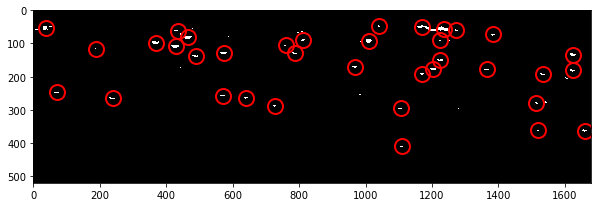

In [53]:
n=1500

f = tp.locate(frames[n], 31, invert=False,minmass=2000)
plt.figure()  # make a new figure
tp.annotate(f, frames[n]);

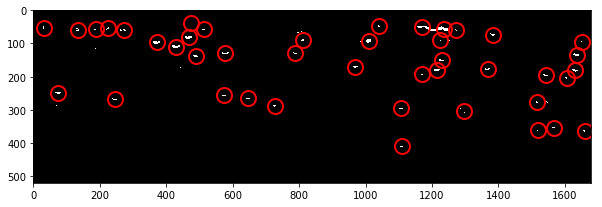

In [54]:
n=1501

f = tp.locate(frames[n], 31, invert=False,minmass=2000)
plt.figure()  # make a new figure
tp.annotate(f, frames[n]);

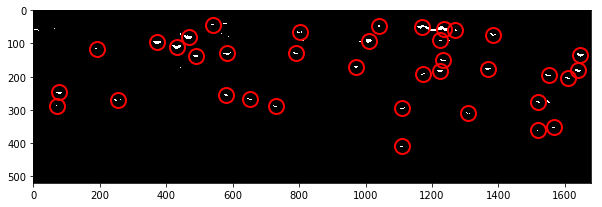

In [55]:
n=1502

f = tp.locate(frames[n], 31, invert=False,minmass=2000)
plt.figure()  # make a new figure
tp.annotate(f, frames[n]);

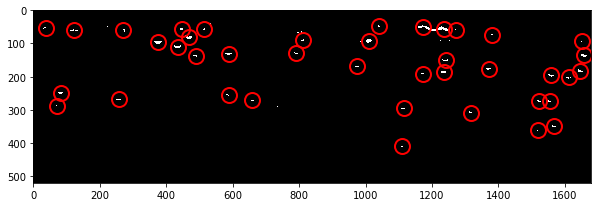

In [56]:
n=1503

f = tp.locate(frames[n], 31, invert=False,minmass=2000)
plt.figure()  # make a new figure
tp.annotate(f, frames[n]);

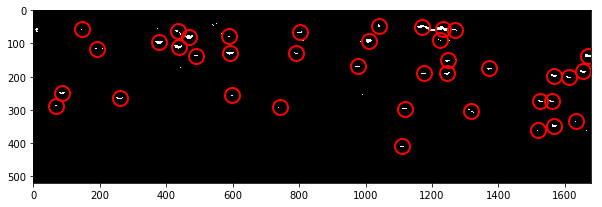

In [57]:
n=1504

f = tp.locate(frames[n], 31, invert=False,minmass=2000)
plt.figure()  # make a new figure
tp.annotate(f, frames[n]);

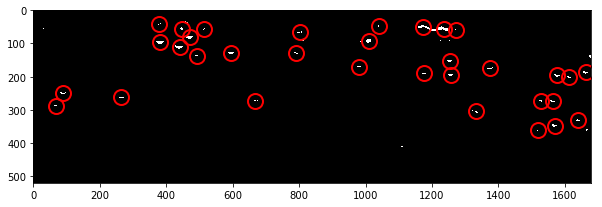

In [58]:
n=1505

f = tp.locate(frames[n], 31, invert=False,minmass=2000)
plt.figure()  # make a new figure
tp.annotate(f, frames[n]);

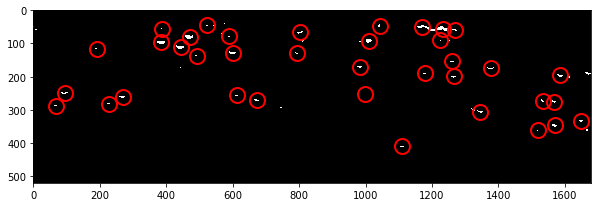

In [59]:
n=1506

f = tp.locate(frames[n], 31, invert=False,minmass=2000)
plt.figure()  # make a new figure
tp.annotate(f, frames[n]);

In [294]:
pred = trackpy.predict.NearestVelocityPredict() #this uses predictive linking based on learning 
tr = pred.link_df(features, 5,5)

Frame 1699: 32 trajectories present


In [301]:
#filter out trajectories with less than 50 pixels of movement 
tr1 = tp.filter_stubs(tr, 50)
# Compare the number of particles in the unfiltered and filtered data.
print('Before:', tr['particle'].nunique())
print('After:', tr1['particle'].nunique())

Before: 1335
After: 23


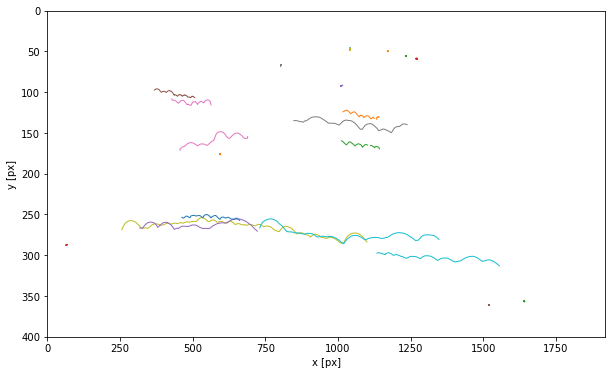

In [302]:
#plot the trajectories 
plt.figure()
plt.xlim(xmin=0,xmax=1920)
plt.ylim(ymin=0,ymax=400)

ax = tp.plot_traj(tr1)

In [329]:
V = []
particles = tr1.particle.unique()
for p in particles: 
        pf=tr1[tr1.particle==p] #find the elements of tr1 corresponding to trajectory of particle p 
        pf0 = pf.iloc[[0],[0,1,-2]] #draw out the initial x,y, frame values over the trajectory of particle p 
        pfN = pf.iloc[[-1],[0,1,-2]] #draw out the final x,y,frame values over the trajectory of particle p 
        x0 = pf0.iat[0,0] #just gettting initial x,y,f values
        y0 = pf0.iat[0,1]
        f0 = pf0.iat[0,2]
        xN = pfN.iat[0,0] #and getting final x,y,f values 
        yN = pfN.iat[0,1]
        fN = pfN.iat[0,2]
        Dx = xN-x0 #x displacement
        Dy = yN-y0 #y displacement
        Df = fN-f0 #number of frames of trajectory 
        Dr = np.sqrt(Dx**2+Dy**2) #rms displacement over full path 
        v = Dr/Df*.02*190 #approximately the average velocity over the trajectory in cm/s
        V.append(v) #make an array of average velocities 
        
        
        

In [336]:
V = V[V>0.2] #filter values below 0.2cm/s

In [337]:
V


array([  7.47811706,   8.73334484,  22.40425433,  25.8168034 ,
        26.04871682,  17.70294943,  22.13139137,  31.68432942,
        12.42465822,   6.9054449 ,   9.38495039])

In [338]:
V_avg = np.mean(V)

In [339]:
V_avg #mean velocity 

17.33772365254918

mean velocity is 17cm/s 